In [9]:
# Write code that obtains the two principle components from 17 types of food in UK

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

df = pd.read_excel("../datasets/pca_uk.xlsx")
df

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese
5,54,41,62,64,Confectionery
6,193,209,184,235,Fats and oils
7,147,93,122,160,Fish
8,1102,674,957,1137,Fresh fruit
9,720,1033,566,874,Fresh potatoes


In [6]:
X = np.array([df[i].values for i in df.columns if i != "Features"])

print(X)

pca = PCA(n_components = 2)
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


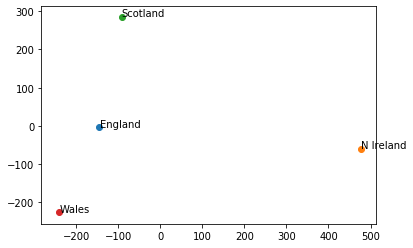

In [7]:
# Lets visualize the principle components

for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i+0.3, j+0.3, df.columns[:-1][k])

plt.show()

In [8]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


In [10]:
def covariance(dataframe):
    cov_matrix = []
    for index, row in dataframe.iterrows():
        cov_row = []
        x_bar = sum(row[:-1]) / (len(row) - 1)
        for index2, row2 in dataframe.iterrows():
            y_bar = sum(row2[:-1]) / (len(row2) - 1)
            cov = (1 / (len(row) - 1)) * sum([(x - x_bar) * (y - y_bar) for x,y in zip(row[:-1], row2[:-1])])
            cov_row.append(cov)
        cov_matrix.append(cov_row)
    return cov_matrix

In [13]:
A = np.array([[2, 0], [1, 5]])
V = np.array([[3], [4]])

np.dot(A, V)

array([[ 6],
       [23]])

In [15]:
eig_value, eig_vector = np.linalg.eig(A)
print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [16]:
np.dot(A, eig_vector)

array([[ 0.        ,  1.8973666 ],
       [ 5.        , -0.63245553]])

In [17]:
np.dot(2, eig_vector)

array([[ 0.        ,  1.8973666 ],
       [ 2.        , -0.63245553]])

In [20]:
# Our function to comapre 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  X - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigendecomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    eig_value = eig_value[idx]
    # sort eigenvectors according to same index
    eig_vector = eig_vector[:, idx]
    P = np.dot(C, eig_vector)[:, :n_comp]
    return P

# so basically we get the eigenvalues from the covariance matrix, sort them, then pick the top n eigenvalues to get
# the components we want.

In [21]:
X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
PCA_calculation(X, 2)

[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[ 1.65392786, -0.2775295 ],
       [ 0.84584087,  0.31153366],
       [-0.55130929,  0.09250983],
       [-1.94845944, -0.126514  ]])